In [27]:
import sys

sys.path.insert(0, '/media/moraa/New Volume/Ontita/10Academy/Cohort B/Projects/Week1/User_Analytics_in_the_telecommunication_Industry')

from Scripts.note import load_data_from_database
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Specify the path to the .env file
env_file_path = '/media/moraa/New Volume/Ontita/10Academy/Cohort B/Projects/Week1/User_Analytics_in_the_telecommunication_Industry/.env'

# Call the function to load data from the database
df = load_data_from_database(env_file_path)

# Now you can use the DataFrame 'df' for further analysis
print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

## Data Preprocessing

In [4]:

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Print numerical columns
print("Numerical Columns:")
print(numerical_cols)


Numerical Columns:
           Bearer Id  Start ms  End ms  Dur. (ms)          IMSI  \
0       1.311448e+19     770.0   662.0  1823652.0  2.082014e+14   
1       1.311448e+19     235.0   606.0  1365104.0  2.082019e+14   
2       1.311448e+19       1.0   652.0  1361762.0  2.082003e+14   
3       1.311448e+19     486.0   171.0  1321509.0  2.082014e+14   
4       1.311448e+19     565.0   954.0  1089009.0  2.082014e+14   
...              ...       ...     ...        ...           ...   
149996  7.277826e+18     451.0   214.0    81230.0  2.082022e+14   
149997  7.349883e+18     483.0   187.0    97970.0  2.082019e+14   
149998  1.311448e+19     283.0   810.0    98249.0  2.082017e+14   
149999  1.311448e+19     696.0   327.0    97910.0  2.082021e+14   
150000           NaN       NaN     NaN        NaN           NaN   

        MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0        3.366496e+10  3.552121e+13             42.0              5.0   
1        3.368185e+10  3.57940

In [5]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object'])

# Print categorical columns
print("\nCategorical Columns:")
print(categorical_cols)


Categorical Columns:
                  Start              End     Last Location Name  \
0        4/4/2019 12:01  4/25/2019 14:35  9.16456699548519E+015   
1        4/9/2019 13:04   4/25/2019 8:15                L77566A   
2        4/9/2019 17:42  4/25/2019 11:58                D42335A   
3        4/10/2019 0:31   4/25/2019 7:36                T21824A   
4       4/12/2019 20:10  4/25/2019 10:40                D88865A   
...                 ...              ...                    ...   
149996   4/29/2019 7:28   4/30/2019 6:02                D20434A   
149997   4/29/2019 7:28  4/30/2019 10:41                D10223C   
149998   4/29/2019 7:28  4/30/2019 10:46                T51102A   
149999   4/29/2019 7:28  4/30/2019 10:40                L88342B   
150000             None             None                   None   

       Handset Manufacturer                 Handset Type  
0                   Samsung   Samsung Galaxy A5 Sm-A520F  
1                   Samsung  Samsung Galaxy J5 (Sm-J530

Handling Missing Values

In [6]:
# Check for missing values in the DataFrame
missing_values = numerical_cols.isna().sum()

# Print the columns with missing values and their corresponding counts
print("Missing Values:")
print(missing_values)

Missing Values:
Bearer Id                                      991
Start ms                                         1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP

In [7]:
# Calculate the percentage of missing values for each column
missing_percentage = (numerical_cols.isna().sum() / len(numerical_cols)) * 100

# Filter columns with more than 70% missing values
columns_with_high_missing = missing_percentage[missing_percentage > 70]

# Print the columns with more than 70% missing values
print("Columns with More Than 70% Missing Values:")
print(columns_with_high_missing)

Columns with More Than 70% Missing Values:
Nb of sec with 37500B < Vol UL            86.835421
Nb of sec with 6250B < Vol UL < 37500B    74.561503
dtype: float64


In [8]:
# Filter columns with more than 70% missing values
columns_to_drop = columns_with_high_missing.index.tolist()

# Drop columns with more than 70% missing values
numerical_cols = numerical_cols.drop(columns=columns_to_drop)


In [9]:
# Replace missing values with median for each numerical column
numerical_cols = numerical_cols.fillna(numerical_cols.mean())

# Display the DataFrame after filling missing values with median
print("DataFrame after filling missing values with median:")
print(numerical_cols)

DataFrame after filling missing values with median:
           Bearer Id  Start ms     End ms     Dur. (ms)          IMSI  \
0       1.311448e+19  770.0000  662.00000  1.823652e+06  2.082014e+14   
1       1.311448e+19  235.0000  606.00000  1.365104e+06  2.082019e+14   
2       1.311448e+19    1.0000  652.00000  1.361762e+06  2.082003e+14   
3       1.311448e+19  486.0000  171.00000  1.321509e+06  2.082014e+14   
4       1.311448e+19  565.0000  954.00000  1.089009e+06  2.082014e+14   
...              ...       ...        ...           ...           ...   
149996  7.277826e+18  451.0000  214.00000  8.123000e+04  2.082022e+14   
149997  7.349883e+18  483.0000  187.00000  9.797000e+04  2.082019e+14   
149998  1.311448e+19  283.0000  810.00000  9.824900e+04  2.082017e+14   
149999  1.311448e+19  696.0000  327.00000  9.791000e+04  2.082021e+14   
150000  1.013887e+19  499.1882  498.80088  1.046086e+05  2.082016e+14   

        MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  

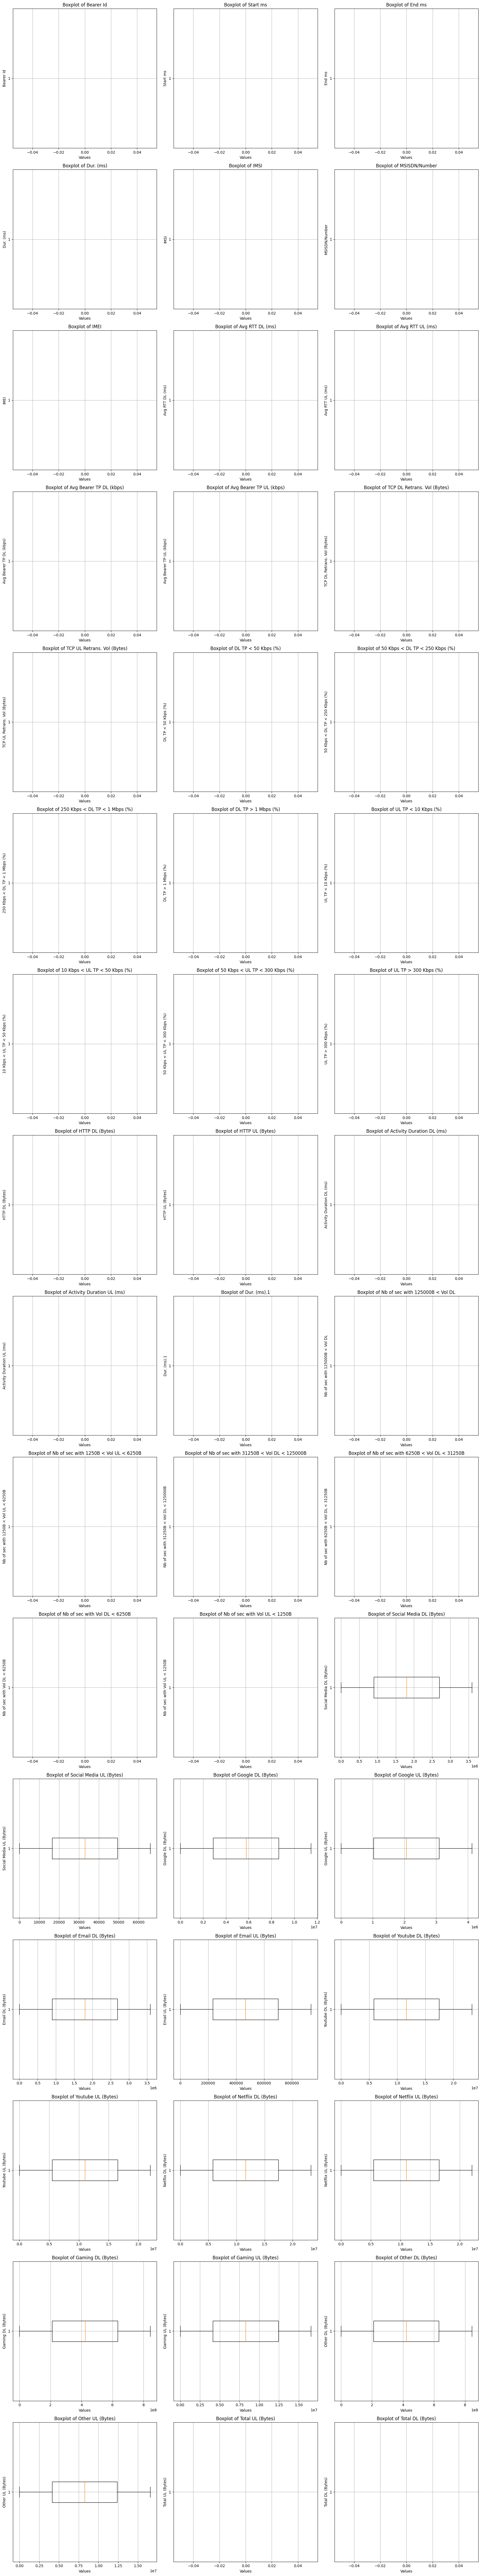

In [10]:
# Calculate the number of rows and columns for subplots
num_cols = len(numerical_cols.columns)
num_rows = (num_cols + 2) // 3  # Adjust as needed

# Create boxplots for each numerical column
plt.figure(figsize=(18, num_rows * 6))  # Adjust the figure height based on the number of rows
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(num_rows, 3, i+1)  # Adjust the subplot layout
    plt.boxplot(df[col], vert=False)
    plt.title('Boxplot of ' + col)
    plt.xlabel('Values')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# Step 2: Compute Dispersion Parameters
dispersion_params = {}
for col in numerical_cols.columns:
    data = numerical_cols[col]
    # Range
    data_range = data.max() - data.min()
    # Variance
    data_variance = data.var()
    # Standard Deviation
    data_std_dev = data.std()
    # Interquartile Range (IQR)
    data_iqr = data.quantile(0.75) - data.quantile(0.25)
    
    dispersion_params[col] = {
        'Range': data_range,
        'Variance': data_variance,
        'Standard Deviation': data_std_dev,
        'Interquartile Range (IQR)': data_iqr
    }

# Step 3: Interpretation
for col, params in dispersion_params.items():
    print(f"Dispersion Parameters for {col}:")
    print(params)

Dispersion Parameters for Bearer Id:
{'Range': 6.26900364859067e+18, 'Variance': 8.31514643133835e+36, 'Standard Deviation': 2.8835995615442775e+18, 'Interquartile Range (IQR)': 5.692542731480581e+18}
Dispersion Parameters for Start ms:
{'Range': 999.0, 'Variance': 83296.2355540933, 'Standard Deviation': 288.61087220354904, 'Interquartile Range (IQR)': 499.0}
Dispersion Parameters for End ms:
{'Range': 999.0, 'Variance': 82999.70444455891, 'Standard Deviation': 288.0966928733458, 'Interquartile Range (IQR)': 499.0}
Dispersion Parameters for Dur. (ms):
{'Range': 1852194.0, 'Variance': 6567052314.333346, 'Standard Deviation': 81037.35135314669, 'Interquartile Range (IQR)': 74988.0}
Dispersion Parameters for IMSI:
{'Range': 10027194860177.0, 'Variance': 4.5998344342438543e+20, 'Standard Deviation': 21447224608.894863, 'Interquartile Range (IQR)': 370342358.0}
Dispersion Parameters for MSISDN/Number:
{'Range': 882363507487729.0, 'Variance': 5.947410209613011e+24, 'Standard Deviation': 2438

Graphical Univariate Analysis

/tmp/ipykernel_11629/3167584914.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


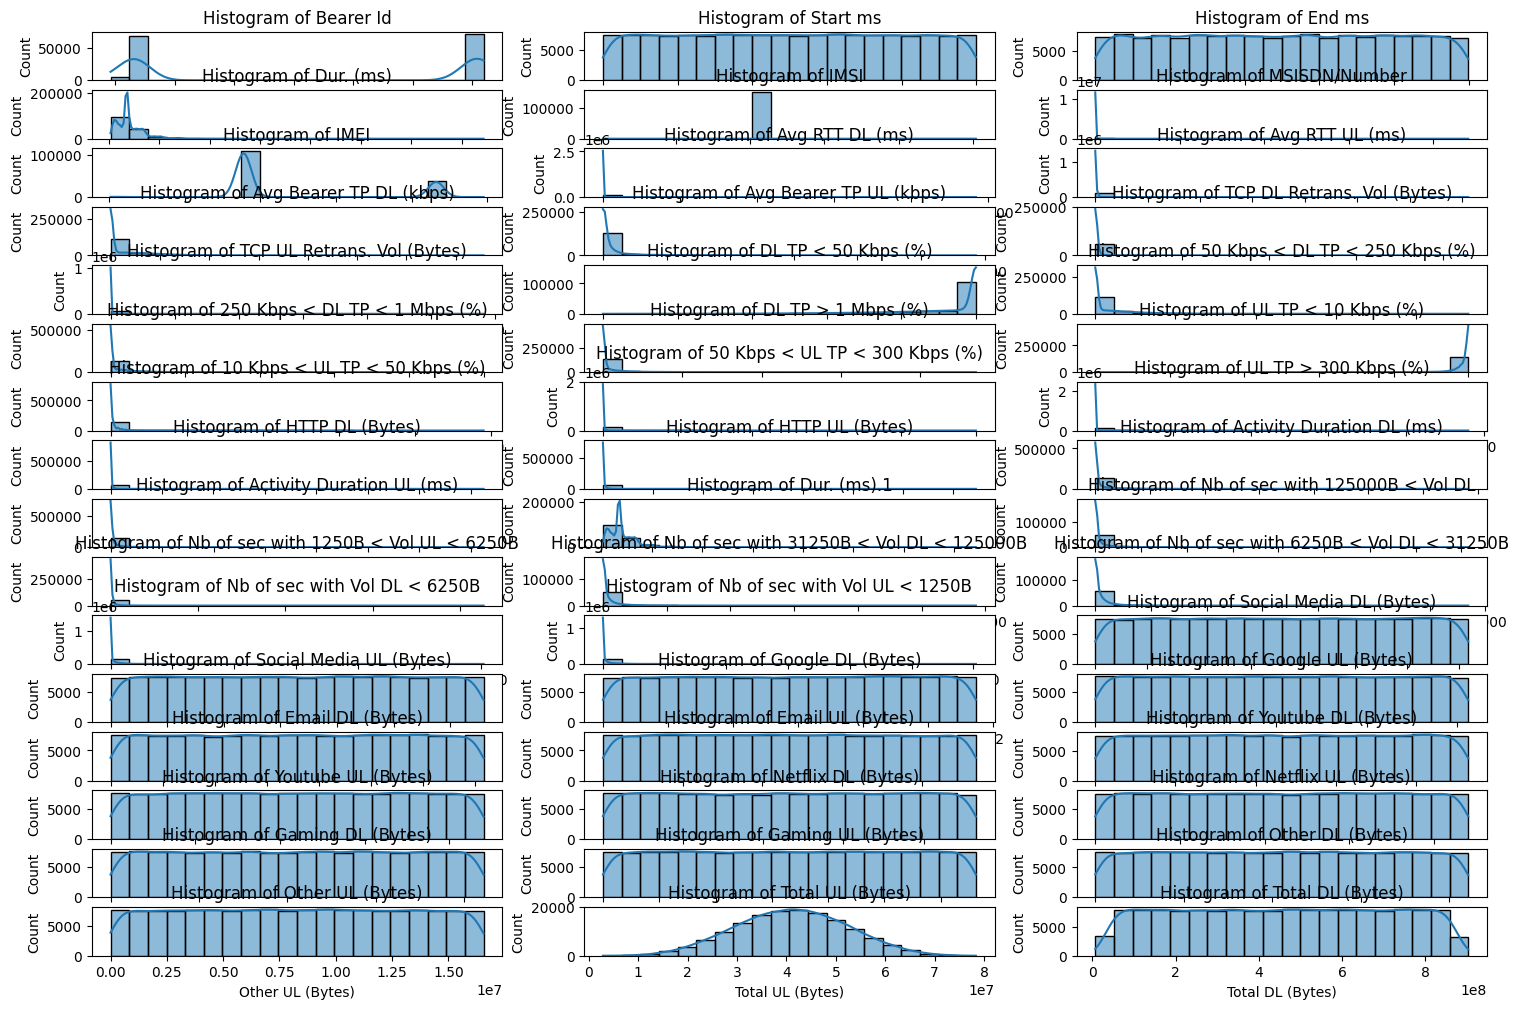

In [12]:
# Plot histograms for numerical columns
plt.figure(figsize=(18, 12))  # Larger figsize
num_cols = len(numerical_cols.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calculate number of rows needed
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title('Histogram of ' + col)
plt.tight_layout()
plt.show()


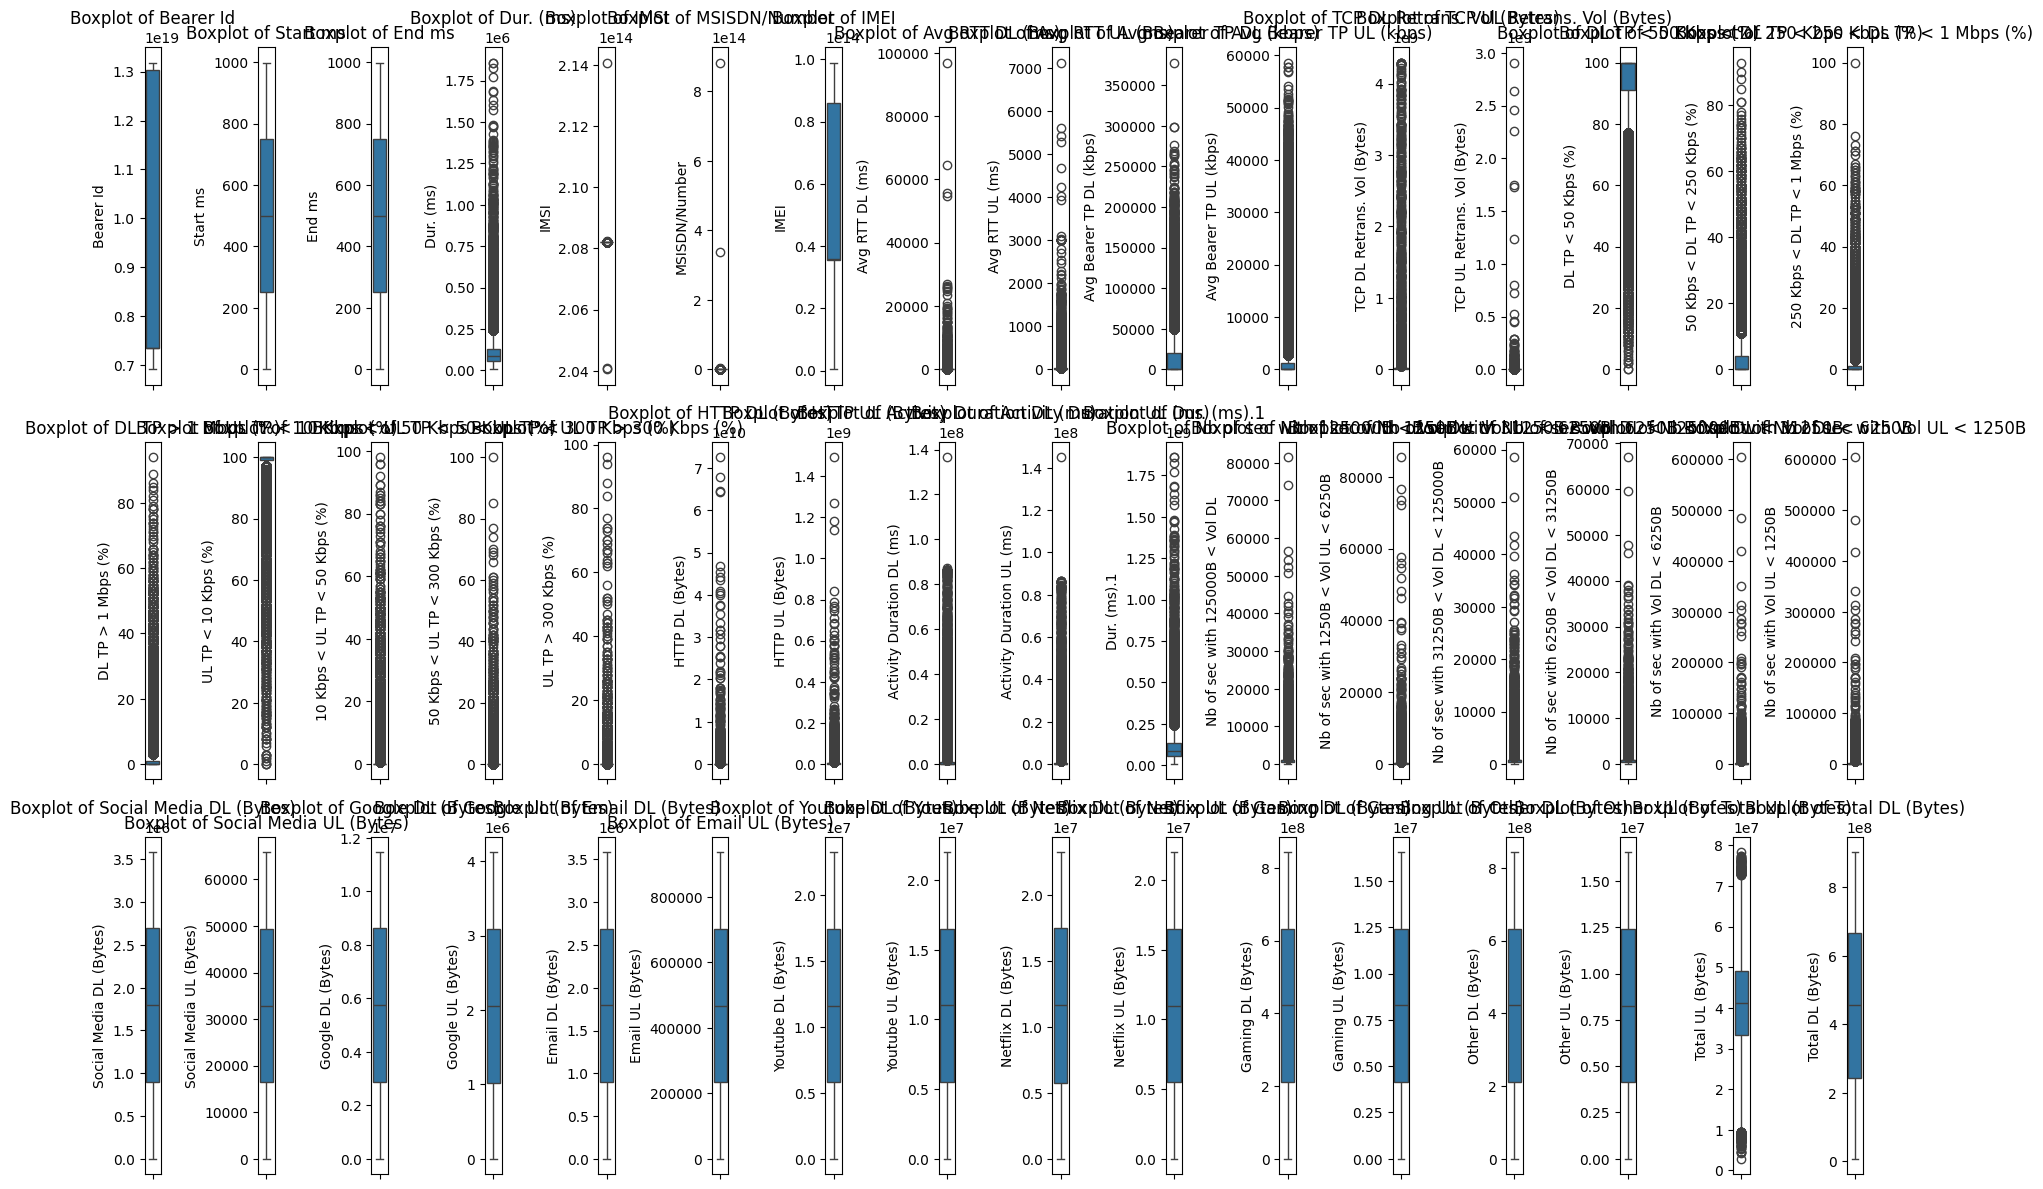

In [13]:
# Plot boxplots for numerical columns
plt.figure(figsize=(18, 12))  # Larger figsize
num_cols = len(numerical_cols.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calculate number of rows needed
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(3, num_rows, i+1)
    sns.boxplot(y=numerical_cols[col])
    plt.title('Boxplot of ' + col)
plt.tight_layout()
plt.show()

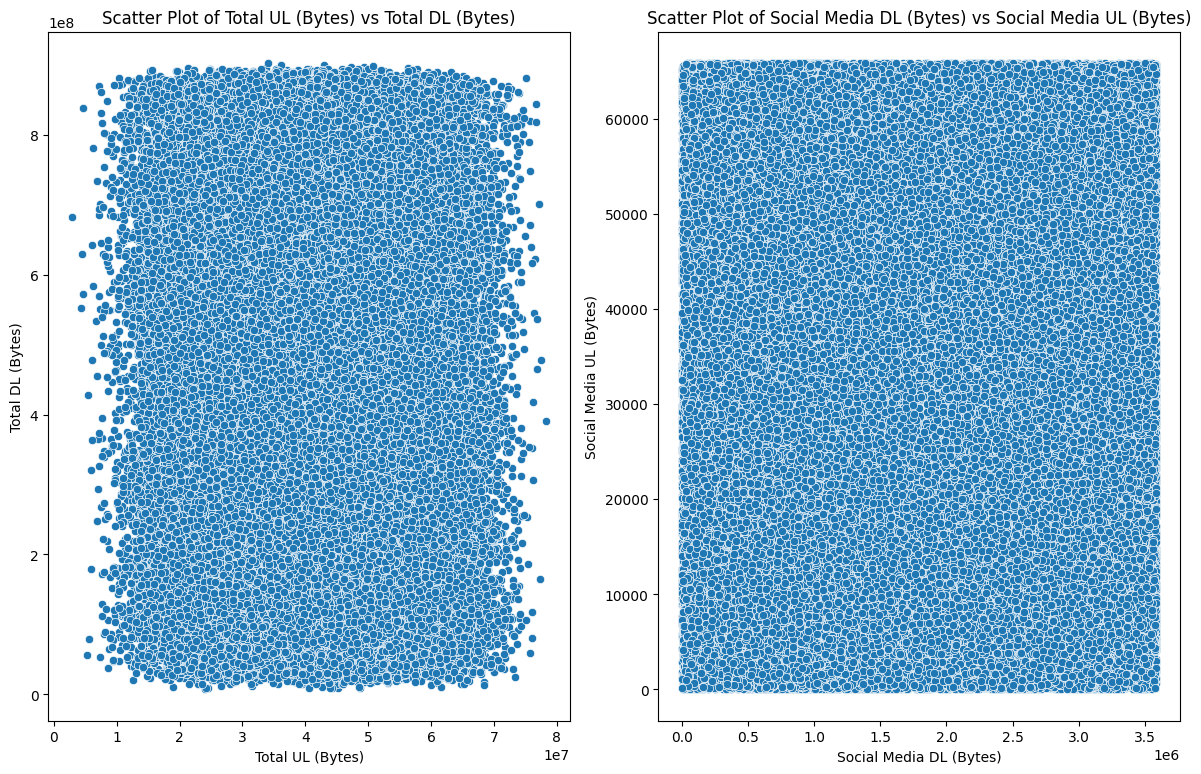

In [14]:
# Select pairs of quantitative columns for scatter plot visualization
quantitative_pairs = [('Total UL (Bytes)', 'Total DL (Bytes)'),
                      ('Social Media DL (Bytes)', 'Social Media UL (Bytes)')]

# Plot scatter plots for quantitative pairs
plt.figure(figsize=(12, 8))
for i, pair in enumerate(quantitative_pairs):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(x=pair[0], y=pair[1], data=df)
    plt.title('Scatter Plot of ' + pair[0] + ' vs ' + pair[1])
plt.tight_layout()
plt.show()

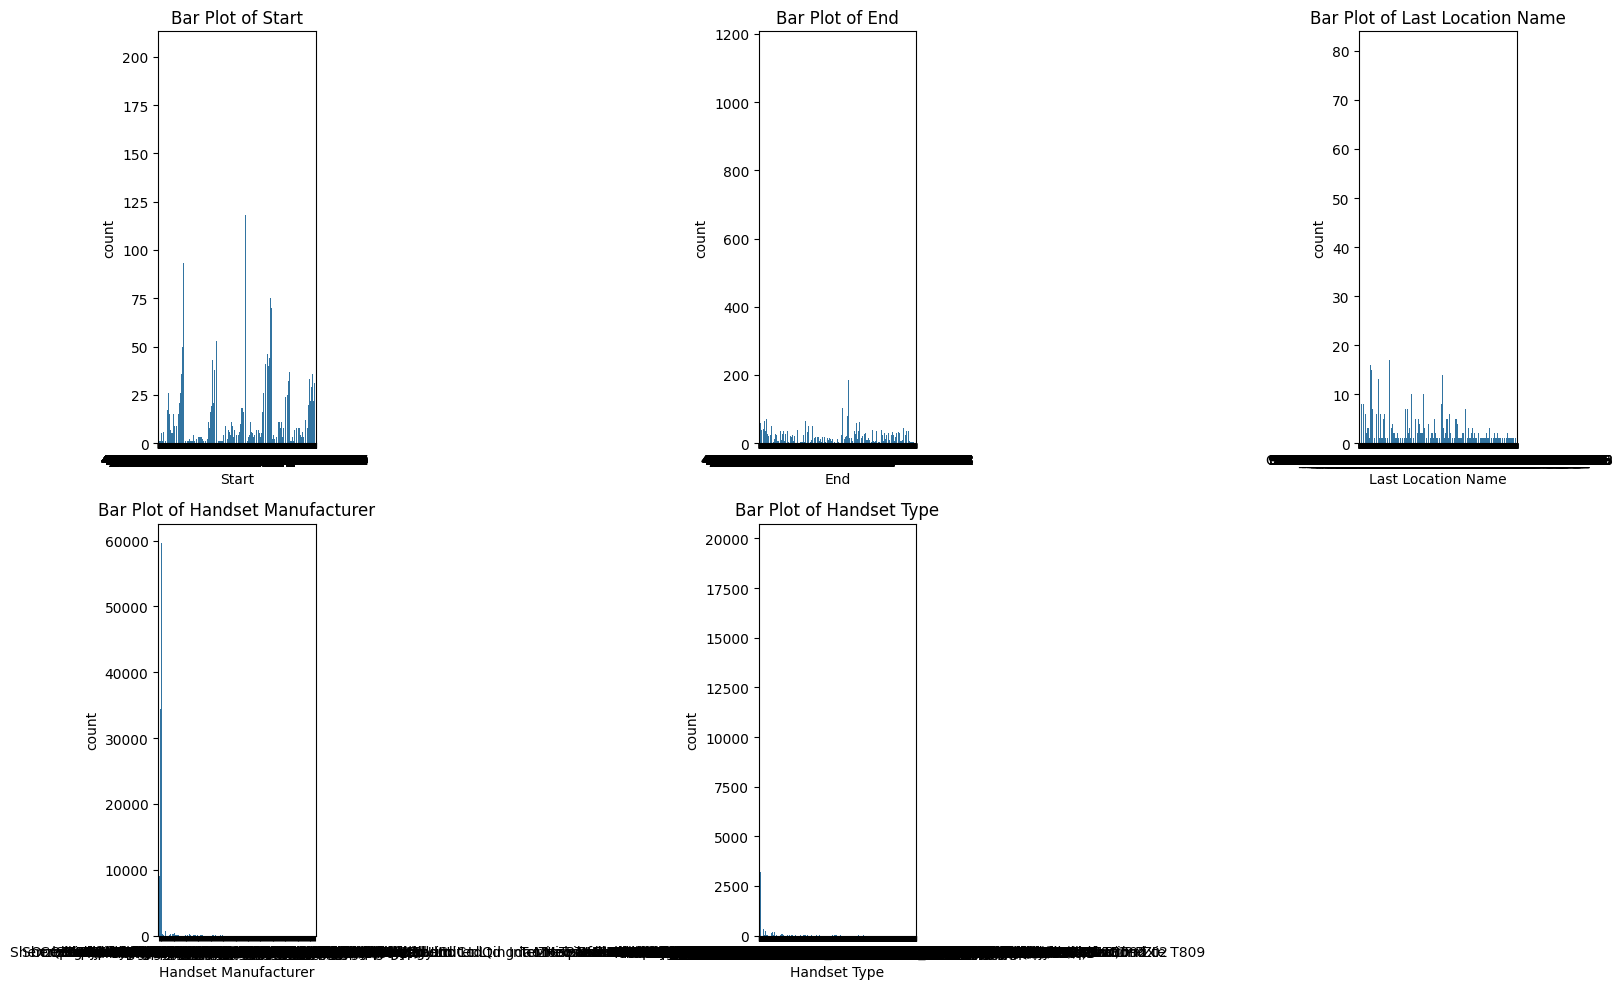

In [15]:

# Create a figure with a larger size
plt.figure(figsize=(16, 10))  # Adjust the figsize as needed

# Determine the number of rows and columns for subplots
num_cols = 3  # Set the number of columns
num_rows = (len(categorical_cols.columns) - 1) // num_cols + 1  # Calculate the number of rows dynamically

# Loop through each categorical column and create a subplot
for i, col in enumerate(categorical_cols.columns):
    plt.subplot(num_rows, num_cols, i+1)  # Adjust the subplot layout as needed
    sns.countplot(x=col, data=df)
    plt.title('Bar Plot of ' + col)

plt.tight_layout()
plt.show()

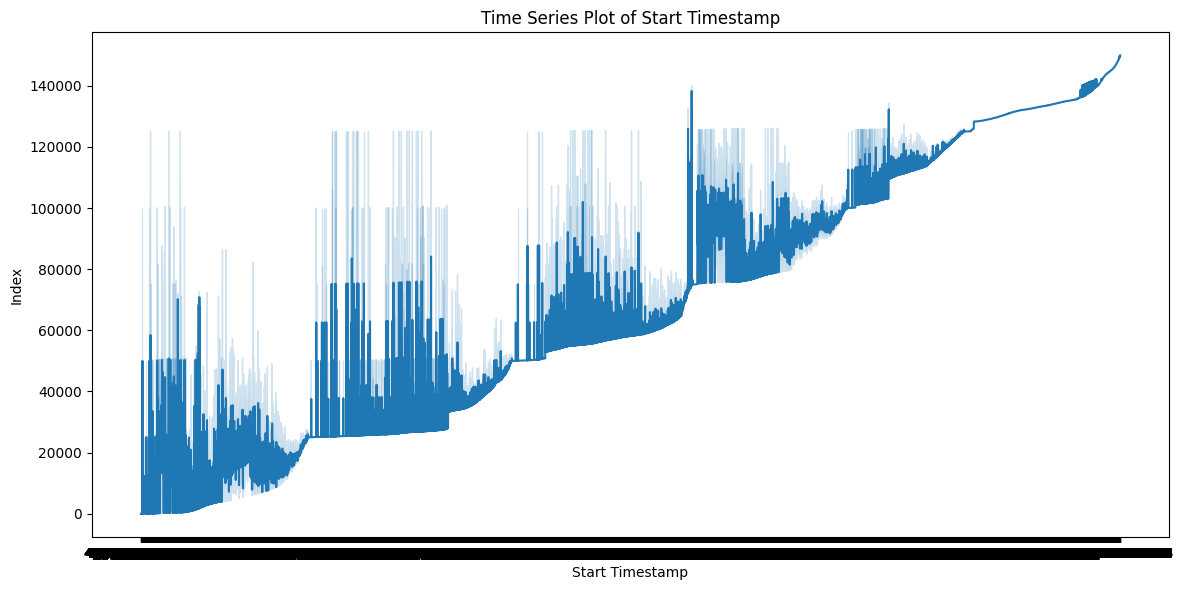

In [16]:
# Plot time series for 'Start' variable
plt.figure(figsize=(12, 6))
sns.lineplot(x=categorical_cols['Start'], y=categorical_cols.index, data=df)
plt.title('Time Series Plot of Start Timestamp')
plt.xlabel('Start Timestamp')
plt.ylabel('Index')
plt.tight_layout()
plt.show()


Bivariate Analysis

In [17]:
# Concatenate the two DataFrames along axis 1 (columns)
combined_df = pd.concat([categorical_cols, numerical_cols], axis=1)

combined_df.head()

,Start,End,Last Location Name,Handset Manufacturer,Handset Type,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,4/4/2019 12:01,4/25/2019 14:35,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F,1.311448e+19,770.0,662.0,1823652.0,2.082014e+14,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,4/9/2019 13:04,4/25/2019 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),1.311448e+19,235.0,606.0,1365104.0,2.082019e+14,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,4/9/2019 17:42,4/25/2019 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018),1.311448e+19,1.0,652.0,1361762.0,2.082003e+14,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,4/10/2019 0:31,4/25/2019 7:36,T21824A,undefined,undefined,1.311448e+19,486.0,171.0,1321509.0,2.082014e+14,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4/12/2019 20:10,4/25/2019 10:40,D88865A,Samsung,Samsung Sm-G390F,1.311448e+19,565.0,954.0,1089009.0,2.082014e+14,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [20]:
# Select relevant columns for applications data volume
# Adjust application column names to include suffixes
applications_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                        'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)',
                        'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 
                        'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']


# Calculate the correlation coefficients
correlation = combined_df[applications_columns].corrwith(combined_df['Total DL (Bytes)'] + combined_df['Total UL (Bytes)'])

print("Correlation coefficients between each application and Total DL+UL data:")
print(correlation)

Correlation coefficients between each application and Total DL+UL data:
Social Media DL (Bytes)    0.005380
Google DL (Bytes)          0.012108
Email DL (Bytes)           0.004283
Youtube DL (Bytes)         0.025642
Netflix DL (Bytes)         0.024331
Gaming DL (Bytes)          0.998068
Other DL (Bytes)          -0.002795
Social Media UL (Bytes)    0.000196
Google UL (Bytes)          0.005840
Email UL (Bytes)          -0.001483
Youtube UL (Bytes)         0.023722
Netflix UL (Bytes)         0.024944
Gaming UL (Bytes)          0.020431
Other UL (Bytes)           0.017938
dtype: float64


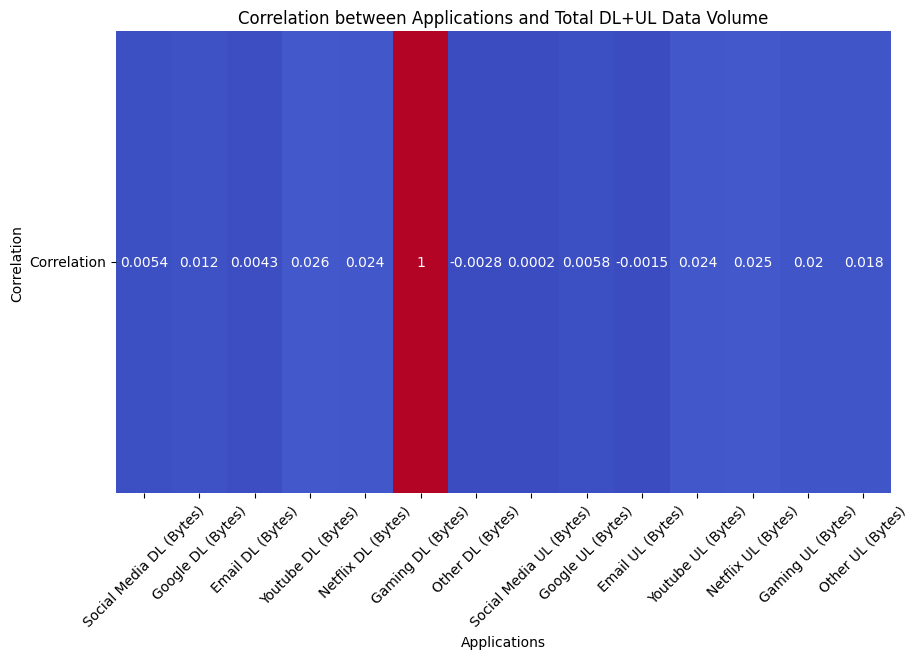

In [21]:
# Convert correlation to DataFrame for plotting
correlation_df = pd.DataFrame(correlation, columns=['Correlation'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df.transpose(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation between Applications and Total DL+UL Data Volume')
plt.xlabel('Applications')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [22]:
# Calculate total duration for all sessions for each user
combined_df['Total Duration (s)'] = (combined_df['Dur. (ms)'] + combined_df['Dur. (ms).1']) / 1000

# Group by MSISDN/Number (user) and calculate the total duration
user_total_duration = combined_df.groupby('MSISDN/Number')['Total Duration (s)'].sum()

# Segment users into deciles based on total duration
user_total_duration_deciles = pd.qcut(user_total_duration, q=10, labels=False)

# Assign decile class to each user in the original DataFrame
combined_df['Decile Class'] = combined_df['MSISDN/Number'].map(user_total_duration_deciles)

# Compute the total data (DL+UL) for each decile class
total_data_per_decile = combined_df.groupby('Decile Class')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

# Compute the total data (DL+UL) in bytes
total_data_per_decile['Total Data (DL+UL)'] = total_data_per_decile['Total DL (Bytes)'] + total_data_per_decile['Total UL (Bytes)']

# Sort the deciles by total data in descending order
total_data_per_decile.sort_values(by='Total Data (DL+UL)', ascending=False, inplace=True)

# Display the result
print("Total data (DL+UL) per decile class:")
print(total_data_per_decile)

Total data (DL+UL) per decile class:
              Total DL (Bytes)  Total UL (Bytes)  Total Data (DL+UL)
Decile Class                                                        
9                 1.411462e+13      1.280285e+12        1.539491e+13
8                 8.536321e+12      7.703095e+11        9.306631e+12
7                 7.169617e+12      6.522444e+11        7.821862e+12
2                 5.965793e+12      5.414028e+11        6.507195e+12
5                 5.892506e+12      5.332956e+11        6.425801e+12
6                 5.646784e+12      5.056942e+11        6.152478e+12
1                 5.604511e+12      5.053914e+11        6.109903e+12
4                 5.378404e+12      4.864862e+11        5.864890e+12
0                 4.989433e+12      4.493515e+11        5.438784e+12
3                 4.898978e+12      4.437611e+11        5.342739e+12


In [23]:
# Select the columns for correlation analysis
selected_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                    'Other DL (Bytes)']

# Compute the correlation matrix
correlation_matrix = combined_df[selected_columns].corr()

# Interpret the findings
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Email DL (Bytes)                        0.004745          -0.000039   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004745           -0.001389   
Google DL (Bytes)               -0.000039            0.001760   
Email DL (Bytes)                 1.000000            0.001679   
Youtube DL (Bytes)               0.001679            1.000000   
Netflix DL (Bytes)               0.001351            0.001202   
Gaming DL (Bytes)    

In [25]:
# Select the columns for PCA
selected_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                    'Other DL (Bytes)']

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
principal_components = pca.fit_transform(combined_df[selected_columns])

# Create a DataFrame to store the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

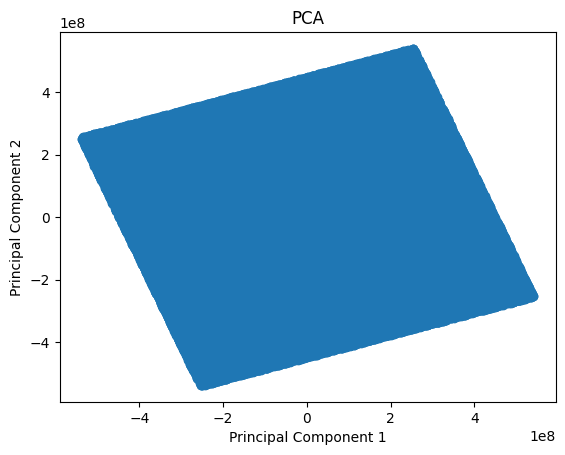

In [26]:
# Plot the principal components 
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()